In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL 
import pickle
%matplotlib inline

In [2]:
haar=cv2.CascadeClassifier('C:/project/16B-PROJECT/Data/Classifier/haarcascade_frontalface_default.xml')
mean  = np.load('C:/project/16B-PROJECT/Data/data.npz')
model_svm  = pickle.load(open('C:/project/16B-PROJECT/Data/model_svm.pickle','rb'))
model_pca  = pickle.load(open('C:/project/16B-PROJECT/Data/model_pca.pickle','rb'))
mean=mean['arr_0']

In [3]:
def pipeline_model(img,color='rgb'):
    # step-2: convert into gray scale
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # step-3: crop the face (using haar cascase classifier)
    faces = haar.detectMultiScale(gray,1.2,minNeighbors=5)

    print(faces)
    for i in faces:
        cv2.rectangle(img,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,255,255),1) # drawing rectangle

        roi = gray[i[1]:i[1]+i[3],i[0]:i[0]+i[2]] # crop image

        # step - 4: normalization (0-1)
        roi = roi / 255.0

        # step-5: resize images (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)

        #step-6: Flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1

        #print(mean)


        # step-7: subtract with mean
        roi_mean = roi_reshape - mean

        #print(roi_reshape)

        #print(roi_mean)

        # step -8: get eigen image
        eigen_image = model_pca.transform(roi_mean)

        #print(eigen_image.shape)
        # step -9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]

        print(results)
        # step -10:
        predict = results.argmax() # 0 or 1 
        score = results[predict]
        # step -11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(i[0],i[1]),font,1,(255,255,0),2)
    return img

In [9]:
gender_pre=['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX
img=PIL.Image.open('D:/TEST/6.jpeg')
img=pipeline_model(np.array(img))

[[176 513 207 207]]


MemoryError: Unable to allocate 288. MiB for an array with shape (3770, 10000) and data type float64

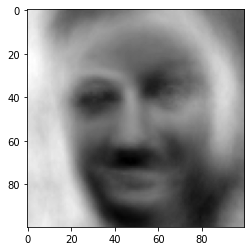

In [71]:
eig_img = model_pca.inverse_transform(eigen_image)
plt.imshow(eig_img.reshape((100,100)),cmap='gray')

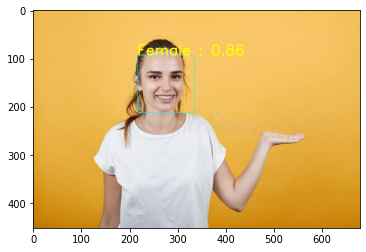

In [5]:
plt.imshow(img)